In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline


In [292]:
train_file_path = 'train.csv'
test_file_path = 'test.csv'


In [293]:
home_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [294]:
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [295]:
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [296]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


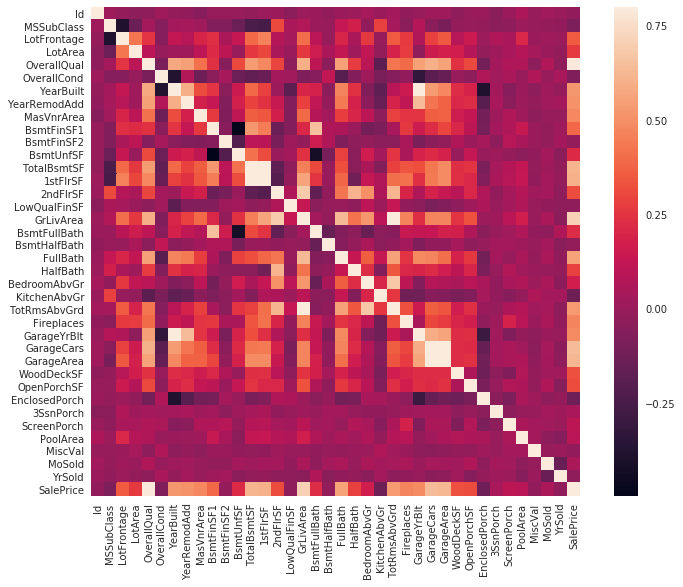

In [297]:
corrmat = home_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [298]:
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','FullBath']

In [299]:
df_train = home_data[cols].copy()
df_test = test_data[['OverallQual','GrLivArea','GarageCars','FullBath']].copy()

In [300]:
df_test.GarageCars.fillna(0, inplace=True)

In [301]:
df_test.describe()

,OverallQual,GrLivArea,GarageCars,FullBath
count,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.078821,1486.045922,1.764907,1.570939
std,1.436812,485.566099,0.777056,0.555190
min,1.000000,407.000000,0.000000,0.000000
25%,5.000000,1117.500000,1.000000,1.000000
50%,6.000000,1432.000000,2.000000,2.000000
75%,7.000000,1721.000000,2.000000,2.000000
max,10.000000,5095.000000,5.000000,4.000000


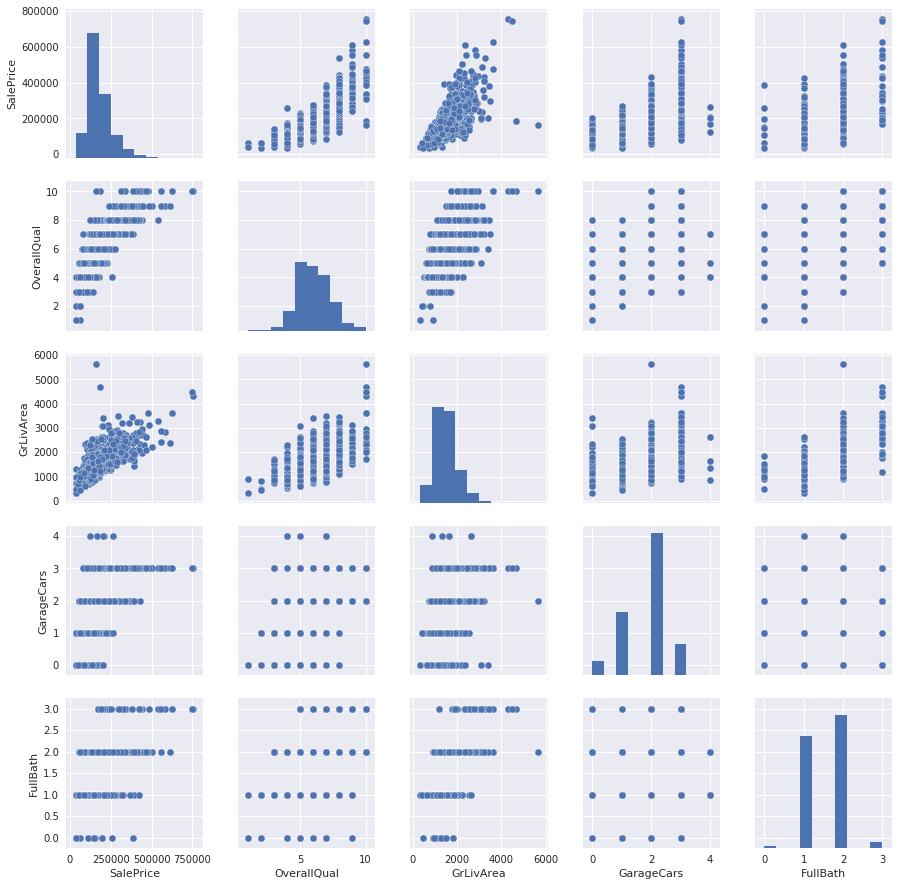

In [302]:
sns.set()
sns.pairplot(df_train, size = 2.5)
plt.show();

In [303]:
df_train.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,FullBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,1.565068
std,79442.502883,1.382997,525.480383,0.747315,0.550916
min,34900.000000,1.000000,334.000000,0.000000,0.000000
25%,129975.000000,5.000000,1129.500000,1.000000,1.000000
50%,163000.000000,6.000000,1464.000000,2.000000,2.000000
75%,214000.000000,7.000000,1776.750000,2.000000,2.000000
max,755000.000000,10.000000,5642.000000,4.000000,3.000000


In [304]:
df_train['SalePrice'] = df_train['SalePrice'].apply(np.log)
#df_test['SalePrice'] = df_test['SalePrice'].apply(np.log)


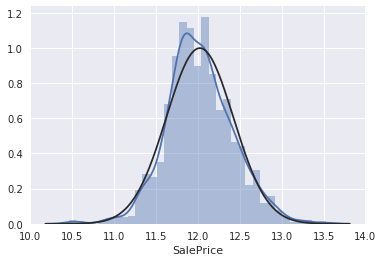

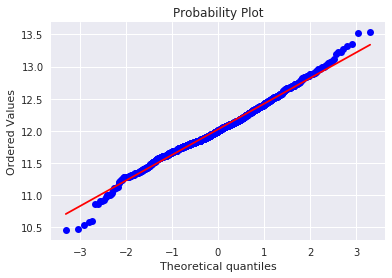

In [305]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [306]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

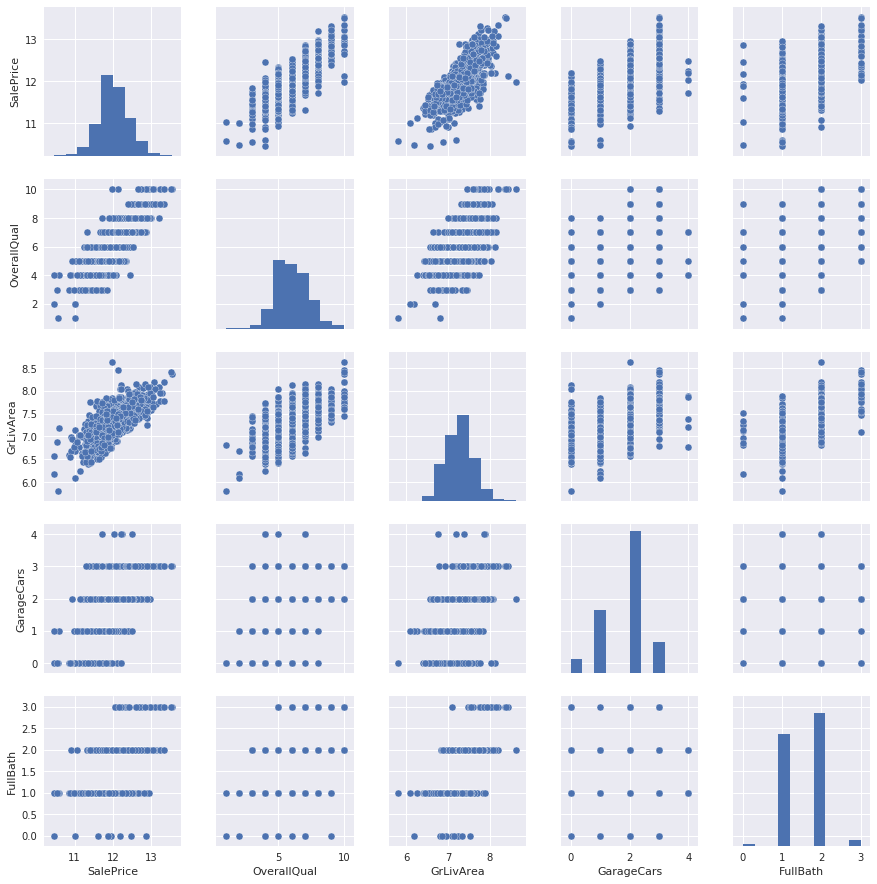

In [307]:
sns.set()
sns.pairplot(df_train, size = 2.5)
plt.show();

In [308]:
features = ['OverallQual','GrLivArea','GarageCars','FullBath']
X_train = df_train[features]
y_train = df_train.SalePrice

X_test = df_test[features]
#y_test = df_test.SalePrice

In [309]:
from sklearn.linear_model import LinearRegression

In [310]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [311]:
predictions = lm.predict(X_test)
#plt.scatter(y_test,predictions)

In [312]:
predictions

array([11.59541258, 11.87864754, 11.95565391, ..., 11.83381214,
       11.50140236, 12.43017563])

In [316]:
print ("R^2 is: \n", lm.score(X_train, y_train))

R^2 is: 
 0.7851862053466074


In [319]:
#from sklearn.metrics import mean_squared_error
#print ('RMSE is: \n', mean_squared_error(y_train, predictions))

In [320]:
submission = pd.DataFrame()

submission['Id'] = test_data['Id']

In [321]:
#submission

In [322]:
submission['SalePrice'] = np.exp(predictions)

In [323]:
submission

,Id,SalePrice
0,1461,108598.467644
1,1462,144155.454109
2,1463,155694.948321
3,1464,177673.902797
4,1465,215336.943877
5,1466,179737.935439
6,1467,158991.904582
7,1468,171829.273634
8,1469,187777.946991
9,1470,106418.633251


In [324]:
submission.to_csv('submission1.csv', index=False)